Download the News Category dataset from here: https://metatext.io/datasets/news-category-dataset then upload it to your google drive in a folder called "datasets"

In [1]:
file_path = 'News_Category_Dataset_v3.json'

In [2]:
import json
from collections import Counter

def count_and_sort_news_by_category(file_path):
    """
    Count and sort the number of news articles in each category.
    
    Args:
        file_path (str): Path to the JSON file containing the news data.  
    Returns:
        list: A sorted list of tuples (category, count) in descending order.
    """
    # Read the news items from the file
    news = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            news.append(json_object)
    
    # Extract categories
    categories = [item['category'] for item in news if 'category' in item]
    
    # Count occurrences of each category
    category_counts = Counter(categories)
    
    # Sort the categories by count in descending order
    sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_categories

# Path to your dataset file
file_path = "News_Category_Dataset_v3.json"  # Replace with your actual file path

# Count and sort the news articles by category
sorted_category_counts = count_and_sort_news_by_category(file_path)
w=[]
# Print the results
print("Number of news articles in each category (sorted):")
for category, count in sorted_category_counts:
    w.append(count)
    print(f"{category}: {count}")
print(w)

Number of news articles in each category (sorted):
POLITICS: 35602
WELLNESS: 17945
ENTERTAINMENT: 17362
TRAVEL: 9900
STYLE & BEAUTY: 9814
PARENTING: 8791
HEALTHY LIVING: 6694
QUEER VOICES: 6347
FOOD & DRINK: 6340
BUSINESS: 5992
COMEDY: 5400
SPORTS: 5077
BLACK VOICES: 4583
HOME & LIVING: 4320
PARENTS: 3955
THE WORLDPOST: 3664
WEDDINGS: 3653
WOMEN: 3572
CRIME: 3562
IMPACT: 3484
DIVORCE: 3426
WORLD NEWS: 3299
MEDIA: 2944
WEIRD NEWS: 2777
GREEN: 2622
WORLDPOST: 2579
RELIGION: 2577
STYLE: 2254
SCIENCE: 2206
TECH: 2104
TASTE: 2096
MONEY: 1756
ARTS: 1509
ENVIRONMENT: 1444
FIFTY: 1401
GOOD NEWS: 1398
U.S. NEWS: 1377
ARTS & CULTURE: 1339
COLLEGE: 1144
LATINO VOICES: 1130
CULTURE & ARTS: 1074
EDUCATION: 1014
[35602, 17945, 17362, 9900, 9814, 8791, 6694, 6347, 6340, 5992, 5400, 5077, 4583, 4320, 3955, 3664, 3653, 3572, 3562, 3484, 3426, 3299, 2944, 2777, 2622, 2579, 2577, 2254, 2206, 2104, 2096, 1756, 1509, 1444, 1401, 1398, 1377, 1339, 1144, 1130, 1074, 1014]


In [3]:
import json
from collections import defaultdict, Counter

def process_file(file_path, limit=22000, min_samples_per_category=30, max_samples_per_category=1000):
    """
    Processes the file to filter and balance news articles by category.
    
    Args:
        file_path (str): Path to the JSON file containing the news data.
        limit (int): Total number of samples to process.
        min_samples_per_category (int): Minimum number of samples per category.
        max_samples_per_category (int): Maximum number of samples per category.
    
    Returns:
        list: List of valid news articles meeting the criteria.
    """
    # Read the news items from the file
    news = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            news.append(json_object)
    
    # Group news by category
    categorized_news = defaultdict(list)
    for item in news:
        category = item.get('category')
        if category:
            categorized_news[category].append(item)
    
    # Only include categories with at least `min_samples_per_category` articles and limit to `max_samples_per_category`
    valid_news = []
    for category, items in categorized_news.items():
        if len(items) >= min_samples_per_category:
            sampled_items = items[:max_samples_per_category]  # Limit to max samples per category
            valid_news.extend(sampled_items)
    
    # Limit the total number of news articles to `limit`
    if len(valid_news) > limit:
        valid_news = valid_news[:limit]  # Slice to ensure the limit is not exceeded
    
    return valid_news

# Path to your dataset file
file_path = "News_Category_Dataset_v3.json"  # Replace with your actual file path
output_file = "filtered_news.json"  # Output file to save the filtered news

# Process the file with the new parameters
news = process_file(file_path, limit=22000, min_samples_per_category=30, max_samples_per_category=1000)

# Save the filtered news to a JSON file
with open(output_file, 'w', encoding="utf-8") as f:
    json.dump(news, f, ensure_ascii=False, indent=4)

# Display the results
print(f"Number of news items processed: {len(news)}")
category_counts = Counter([item['category'] for item in news])
print("Category counts after filtering:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

print(f"Filtered news saved to {output_file}")


Number of news items processed: 22000
Category counts after filtering:
U.S. NEWS: 1000
COMEDY: 1000
PARENTING: 1000
WORLD NEWS: 1000
CULTURE & ARTS: 1000
TECH: 1000
SPORTS: 1000
ENTERTAINMENT: 1000
POLITICS: 1000
WEIRD NEWS: 1000
ENVIRONMENT: 1000
EDUCATION: 1000
CRIME: 1000
SCIENCE: 1000
WELLNESS: 1000
BUSINESS: 1000
STYLE & BEAUTY: 1000
FOOD & DRINK: 1000
MEDIA: 1000
QUEER VOICES: 1000
HOME & LIVING: 1000
WOMEN: 1000
Filtered news saved to filtered_news.json


In [4]:
news[1200]

{'link': 'https://www.huffpost.com/entry/bill-maher-fox-news-migrant-caravan_n_5bd407a4e4b055bc948c103f',
 'headline': 'Bill Maher Shreds Fox News’ Coverage Of The Migrant Caravan',
 'category': 'COMEDY',
 'short_description': '"Can\'t we be a little kinder?"',
 'authors': 'Lee Moran',
 'date': '2018-10-27'}

In [5]:
text_cat_pairs = []

for news_item in news:
    headline = news_item.get("headline")
    short_description = news_item.get("short_description")
    text = headline + " || " + short_description
    category = news_item.get("category")
    text_cat_pairs.append((text, category))

text_cat_pairs[:5]

[('Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters || Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
  'U.S. NEWS'),
 ("American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video || He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",
  'U.S. NEWS'),
 ('Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer || Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.',
  'U.S. NEWS'),
 ('Cleaner Was Dead In Belk Bathroom For 4 Days Before Body Found: Police || The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported he

In [6]:
# iterate over text_cat_pairs, which is a list of tuples. Looks at the second element in the tuple. Generate a label_to_index dict and an index_to_label dict from those labels.

label_to_index = {}
index_to_label = {}
i = 0

for (_, label) in text_cat_pairs:
    if label not in label_to_index:
        label_to_index[label] = i
        index_to_label[i] = label
        i += 1

In [7]:
label_to_index

{'U.S. NEWS': 0,
 'COMEDY': 1,
 'PARENTING': 2,
 'WORLD NEWS': 3,
 'CULTURE & ARTS': 4,
 'TECH': 5,
 'SPORTS': 6,
 'ENTERTAINMENT': 7,
 'POLITICS': 8,
 'WEIRD NEWS': 9,
 'ENVIRONMENT': 10,
 'EDUCATION': 11,
 'CRIME': 12,
 'SCIENCE': 13,
 'WELLNESS': 14,
 'BUSINESS': 15,
 'STYLE & BEAUTY': 16,
 'FOOD & DRINK': 17,
 'MEDIA': 18,
 'QUEER VOICES': 19,
 'HOME & LIVING': 20,
 'WOMEN': 21}

In [8]:
index_to_label

{0: 'U.S. NEWS',
 1: 'COMEDY',
 2: 'PARENTING',
 3: 'WORLD NEWS',
 4: 'CULTURE & ARTS',
 5: 'TECH',
 6: 'SPORTS',
 7: 'ENTERTAINMENT',
 8: 'POLITICS',
 9: 'WEIRD NEWS',
 10: 'ENVIRONMENT',
 11: 'EDUCATION',
 12: 'CRIME',
 13: 'SCIENCE',
 14: 'WELLNESS',
 15: 'BUSINESS',
 16: 'STYLE & BEAUTY',
 17: 'FOOD & DRINK',
 18: 'MEDIA',
 19: 'QUEER VOICES',
 20: 'HOME & LIVING',
 21: 'WOMEN'}

In [9]:
import torch

def convert_labels(label):
  return torch.tensor(label_to_index[label])


labels = [cat for (text, cat) in text_cat_pairs]
print(labels[20000])
print(convert_labels(labels[20000]))

HOME & LIVING
tensor(20)


In [10]:
labels = [convert_labels(label) for label in labels]
stacked_tensors_y = torch.stack(labels)
stacked_tensors_y.shape

torch.Size([22000])

In [11]:
stacked_tensors_y = stacked_tensors_y.long()

In [12]:
from transformers import BertTokenizer, BertModel

# Load pre-trained model tokenizer and embedding model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
embedding_model = BertModel.from_pretrained('bert-base-uncased')

c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
ex = text_cat_pairs[4][0]
ex

'Reporter Gets Adorable Surprise From Her Boyfriend While Live On TV || "Who\'s that behind you?" an anchor for New York’s PIX11 asked journalist Michelle Ross as she finished up an interview.'

In [14]:
tokens = tokenizer.encode(ex)
print([tokenizer.decode([t]) for t in tokens])

['[CLS]', 'reporter', 'gets', 'adorable', 'surprise', 'from', 'her', 'boyfriend', 'while', 'live', 'on', 'tv', '|', '|', '"', 'who', "'", 's', 'that', 'behind', 'you', '?', '"', 'an', 'anchor', 'for', 'new', 'york', '’', 's', 'pi', '##x', '##11', 'asked', 'journalist', 'michelle', 'ross', 'as', 'she', 'finished', 'up', 'an', 'interview', '.', '[SEP]']


In [15]:
def embed_sentence(sentence):
  inputs = tokenizer(sentence, return_tensors='pt')
  with torch.no_grad():
    outputs = embedding_model(**inputs)
    embeddings = outputs.last_hidden_state
  return embeddings.view(embeddings.size(1), -1)

In [16]:
len(tokens)

45

In [17]:
embedded_example = embed_sentence(ex)
embedded_example.shape

torch.Size([45, 768])

In [18]:
embedded_sentences = [embed_sentence(text) for (text, cat) in text_cat_pairs]
print(embedded_sentences[-1].shape)

torch.Size([37, 768])


In [19]:
len(embedded_sentences)

22000

In [20]:
# Find the maximum length among the embedded sentences
max_len = max([x.shape[0] for x in embedded_sentences])

# Pad the shorter sentences with zeros
padded_sentences = []
for sentence in embedded_sentences:
  padding_length = max_len - sentence.shape[0]
  if padding_length == 0:
    padded_sentences.append(sentence)
  else:
    padding = torch.zeros(padding_length, sentence.shape[1])
    padded_sentence = torch.cat((sentence, padding), dim=0)
    padded_sentences.append(padded_sentence)

# Stack the padded tensors
stacked_tensors_x = torch.stack(padded_sentences)
stacked_tensors_x.shape

torch.Size([22000, 125, 768])

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# Example: Suppose labels are stored in `labels`
labels_tensor = torch.tensor([label_to_index[cat] for _, cat in text_cat_pairs])

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(stacked_tensors_x, labels_tensor, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Prepare DataLoaders
train_data = [(X_train[i], y_train[i]) for i in range(len(X_train))]
val_data = [(X_val[i], y_val[i]) for i in range(len(X_val))]
test_data = [(X_test[i], y_test[i]) for i in range(len(X_test))]

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)


Using device: cuda


Training Epoch 1/100: 100%|██████████| 482/482 [01:01<00:00,  7.87it/s]


Epoch [1/100], Loss: 1.6244, Accuracy: 50.34%
Validation Loss: 1.3552, Validation Accuracy: 63.36%


Training Epoch 2/100: 100%|██████████| 482/482 [01:03<00:00,  7.54it/s]


Epoch [2/100], Loss: 1.1194, Accuracy: 65.59%
Validation Loss: 1.4101, Validation Accuracy: 65.33%


Training Epoch 3/100: 100%|██████████| 482/482 [01:02<00:00,  7.73it/s]


Epoch [3/100], Loss: 0.9467, Accuracy: 70.76%
Validation Loss: 1.2375, Validation Accuracy: 69.30%


Training Epoch 4/100: 100%|██████████| 482/482 [01:01<00:00,  7.83it/s]


Epoch [4/100], Loss: 0.8363, Accuracy: 73.96%
Validation Loss: 1.2451, Validation Accuracy: 69.76%


Training Epoch 5/100: 100%|██████████| 482/482 [01:01<00:00,  7.81it/s]


Epoch [5/100], Loss: 0.6951, Accuracy: 78.16%
Validation Loss: 1.3093, Validation Accuracy: 69.30%


Training Epoch 6/100: 100%|██████████| 482/482 [01:02<00:00,  7.69it/s]


Epoch [6/100], Loss: 0.5473, Accuracy: 83.01%
Validation Loss: 1.4072, Validation Accuracy: 70.06%


Training Epoch 7/100: 100%|██████████| 482/482 [01:03<00:00,  7.64it/s]


Epoch [7/100], Loss: 0.4440, Accuracy: 86.06%
Validation Loss: 1.4441, Validation Accuracy: 70.27%


Training Epoch 8/100: 100%|██████████| 482/482 [01:02<00:00,  7.75it/s]


Epoch [8/100], Loss: 0.3366, Accuracy: 89.31%
Validation Loss: 1.6401, Validation Accuracy: 69.42%


Training Epoch 9/100: 100%|██████████| 482/482 [01:01<00:00,  7.84it/s]


Epoch [9/100], Loss: 0.2653, Accuracy: 91.82%
Validation Loss: 1.8294, Validation Accuracy: 69.18%


Training Epoch 10/100: 100%|██████████| 482/482 [01:02<00:00,  7.77it/s]


Epoch [10/100], Loss: 0.2134, Accuracy: 93.26%
Validation Loss: 1.9530, Validation Accuracy: 69.12%


Training Epoch 11/100: 100%|██████████| 482/482 [01:01<00:00,  7.82it/s]


Epoch [11/100], Loss: 0.1401, Accuracy: 95.60%
Validation Loss: 2.0685, Validation Accuracy: 68.88%


Training Epoch 12/100: 100%|██████████| 482/482 [01:01<00:00,  7.81it/s]


Epoch [12/100], Loss: 0.1080, Accuracy: 96.62%
Validation Loss: 2.2903, Validation Accuracy: 67.55%
Validation Accuracy Decreasing - Early Stopping!
Model saved successfully!


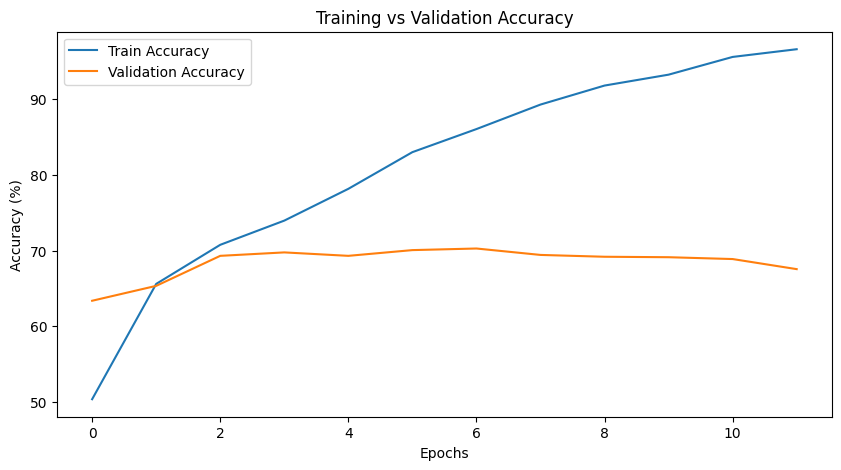

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tqdm import tqdm

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transformer Classifier Model
class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=22, num_heads=64, hidden_dim=256, num_layers=6, dropout=0.7):
        super(TransformerClassifier, self).__init__()
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(input_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.transformer(x)  # No need to permute
        x = x.mean(dim=1)  # Global average pooling
        x = self.dropout(x)
        x = self.fc(x)
        return x

# Ensure correct input dimensions
input_dim = stacked_tensors_x.shape[2]  # Feature size
num_classes = len(label_to_index)  # Number of classes

# Initialize Model & Move to GPU
model = TransformerClassifier(input_dim=input_dim, num_classes=num_classes).to(device)

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer with L2 Regularization (Weight Decay)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)  # L2 regularization

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)  # Reduce LR every 5 epochs

# Training Setup
num_epochs = 100
train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    train_loss, correct_preds, total_preds = 0, 0, 0
    all_preds, all_labels = [], []

    for embeddings, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * embeddings.size(0)
        _, predicted = torch.max(outputs, dim=1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_loss /= total_preds
    train_accuracy = 100 * correct_preds / total_preds
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    scheduler.step()  # Adjust learning rate

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation Loop
    model.eval()
    val_loss, correct_preds, total_preds = 0.0, 0, 0
    val_preds, val_labels = [], []

    with torch.no_grad():
        for embeddings, labels in val_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * embeddings.size(0)
            _, predicted = torch.max(outputs, dim=1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_loss /= total_preds
    val_accuracy = 100 * correct_preds / total_preds
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Early Stopping Condition (If Validation Accuracy Drops)
    if epoch > 10 and val_accuracies[-1] < val_accuracies[-2]:
        print("Validation Accuracy Decreasing - Early Stopping!")
        break

# Save Model
torch.save(model.state_dict(), "transformer_classifier.pth")
print("Model saved successfully!")

# Plot Training & Validation Accuracy
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [50]:
import torch
import json
from transformers import BertTokenizer

# ✅ Save PyTorch Model
model_path = "model"
torch.save(model.state_dict(), f"{model_path}/model.pth")

# ✅ Save Tokenizer (Using Hugging Face)
tokenizer.save_pretrained(model_path)

# ✅ Save Model Configuration (Metadata)
config = {
    "input_dim": 768,   # Must match your model's input size
    "num_classes": 22,  # Must match the number of categories
    "num_heads": 64,
    "hidden_dim": 256,
    "num_layers": 6,
    "dropout": 0.7
}

with open(f"{model_path}/config.json", "w") as f:
    json.dump(config, f)

print(f"Model, tokenizer, and config saved in '{model_path}'")


Model, tokenizer, and config saved in 'model'


In [52]:
import torch
import json
from transformers import BertTokenizer, BertModel

# ✅ Load Model Configuration
model_path = "model"
with open(f"{model_path}/config.json", "r") as f:
    config = json.load(f)

# ✅ Load Tokenizer
tokenizer = BertTokenizer.from_pretrained(model_path)

# ✅ Define TransformerClassifier Model (Must match saved model)
class TransformerClassifier(torch.nn.Module):
    def __init__(self, input_dim, num_classes, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerClassifier, self).__init__()
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = torch.nn.Linear(input_dim, num_classes)
        self.dropout = torch.nn.Dropout(dropout)

    def forward(self, x):
        x = self.transformer(x)
        x = x.mean(dim=1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# ✅ Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerClassifier(**config).to(device)
model.load_state_dict(torch.load(f"{model_path}/model.pth", map_location=device))
model.eval()

# ✅ Load BERT Model for Embeddings
embedding_model = BertModel.from_pretrained("bert-base-uncased").to(device)

# ✅ Define Correct Category Labels (Provided by You)
category_labels = {
    0: 'U.S. NEWS', 1: 'COMEDY', 2: 'PARENTING', 3: 'WORLD NEWS', 4: 'CULTURE & ARTS',
    5: 'TECH', 6: 'SPORTS', 7: 'ENTERTAINMENT', 8: 'POLITICS', 9: 'WEIRD NEWS',
    10: 'ENVIRONMENT', 11: 'EDUCATION', 12: 'CRIME', 13: 'SCIENCE', 14: 'WELLNESS',
    15: 'BUSINESS', 16: 'STYLE & BEAUTY', 17: 'FOOD & DRINK', 18: 'MEDIA',
    19: 'QUEER VOICES', 20: 'HOME & LIVING', 21: 'WOMEN'
}

# ✅ Function to Predict Category
def predict_category(text):
    # ✅ Tokenize Input Text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # ✅ Generate Embeddings Using BERT
    with torch.no_grad():
        embeddings = embedding_model(**inputs).last_hidden_state
        embeddings = embeddings.mean(dim=1)  # Shape: (1, 768)

    embeddings = embeddings.unsqueeze(0)  # Ensure shape is (1, 768)

    # ✅ Pass Embeddings Through Transformer Classifier
    with torch.no_grad():
        outputs = model(embeddings)  # Shape: (1, num_classes)
        predicted_class = torch.argmax(outputs, dim=1).item()

    return category_labels[predicted_class]

# ✅ Example Usage
text_input = "What are the latest advancements in artificial intelligence?"
predicted_category = predict_category(text_input)
print(f"Input Text: {text_input}\nPredicted Category: {predicted_category}")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_44712\2784453295.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"{model_path}/model.pth"

Input Text: What are the latest advancements in artificial intelligence?
Predicted Category: TECH


In [ ]:
text_input = "What are the latest advancements in artificial intelligence?"
predicted_category = predict_category(text_input)
print(f"Input Text: {text_input}\nPredicted Category: {predicted_category}")

Input Text: What are the latest advancements in artificial intelligence?
Predicted Category: TECH


In [54]:
import json
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# ✅ Load JSON Data (News Articles)
with open("filtered_news.json", "r", encoding="utf-8") as f:
    news_data = json.load(f)

# ✅ Load Tokenizer & Pretrained BERT Model for Sentence Embeddings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
embedding_model = BertModel.from_pretrained("bert-base-uncased").to(device)


In [55]:
# ✅ Function to Compute Sentence Embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        embedding = embedding_model(**inputs).last_hidden_state.mean(dim=1).cpu().numpy()
    return embedding

# ✅ Function to Find Similar News Articles
def get_similar_articles(text, predicted_category, top_n=10):
    # ✅ Filter Articles by Category
    category_articles = [article for article in news_data if article["category"] == predicted_category]

    if not category_articles:
        return []

    # ✅ Compute Embedding for Input Text
    input_embedding = get_embedding(text)

    # ✅ Compute Embeddings for Each News Article in the Category
    article_embeddings = []
    for article in category_articles:
        article_embedding = get_embedding(article["headline"])
        article_embeddings.append(article_embedding)

    # ✅ Compute Cosine Similarity
    article_embeddings = np.vstack(article_embeddings)
    similarities = cosine_similarity(input_embedding, article_embeddings).flatten()

    # ✅ Get Top N Most Similar Articles
    top_indices = similarities.argsort()[-top_n:][::-1]
    similar_articles = [category_articles[i] for i in top_indices]

    return similar_articles


In [56]:
# ✅ Example Input
text_input = "What are the latest advancements in artificial intelligence?"
predicted_category = "TECH"  # Assuming this is the predicted category

# ✅ Get Top 10 Similar Articles
similar_articles = get_similar_articles(text_input, predicted_category, top_n=10)

# ✅ Display Results
print("\n🔍 Top 10 Similar Articles:")
for i, article in enumerate(similar_articles, 1):
    print(f"\n{i}. {article['headline']}")
    print(f"   {article['short_description']}")
    print(f"   🔗 {article['link']}")



🔍 Top 10 Similar Articles:

1. What's The Future Of Bitcoin Mining?
   Bitcoin as a currency is simply one application.
   🔗 https://www.huffingtonpost.com/entry/whats-the-future-of-bitcoin-mining_us_57c22ff9e4b00c54015e2ec3

2. Can Silicon Valley Be The Heartbeat Of Technology For Good?
   Will technological revolution result in a safer and better world, or a more dangerous one?
   🔗 https://www.huffingtonpost.com/entry/can-silicon-valley-be-the-heartbeat-of-technology-for_us_58d35876e4b002482d6e6e71

3. Why Are Digital Assistants Like Siri Given Female Voices?
   At an artificial intelligence conference, a good question gets a surprising answer.
   🔗 https://www.huffingtonpost.com/entry/technology-female-voices_us_56c8a6cbe4b0928f5a6c1942

4. Does The World Need A ‘Marshall Plan’ For Technology?
   Investing in global infrastructure should include fast and secure digital connectivity The idea of economic planning dominated
   🔗 https://www.huffingtonpost.com/entry/does-the-world-nee

In [64]:
import os
import torch
import json
from langchain_groq import ChatGroq
from dotenv import load_dotenv

# ✅ Load API Key
load_dotenv()
groq_api_key = os.getenv("GROQ_API_KEY")

# ✅ Initialize LLM (Llama 3)
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Llama3-8b-8192")

# ✅ Define Function to Get Response
def get_response(user_query, chat_history):
    predicted_category = predict_category(user_query)  # 🎯 Classify Query
    similar_articles = get_similar_articles(user_query, predicted_category, top_n=10)  # 📜 Retrieve Articles

    # 🧠 LLM Generates Response
    response = llm.invoke(f"User Query: {user_query}\nPredicted Category: {predicted_category}\n\nGenerate a helpful response based on the category.")

    return response, predicted_category, similar_articles

# ✅ Run Example
chat_history = []
user_query = "What are the latest advancements in artificial intelligence?"
llm_response, predicted_category, articles = get_response(user_query, chat_history)

print(f"🤖 LLM Response: {llm_response}")
print(f"🎯 Predicted Category: {predicted_category}")

print("\n📜 **Top 10 Similar Articles:**")
for article in articles:
    print(f"🔹 {article['headline']} ({article['link']})")


🤖 LLM Response: content='**Latest Advancements in Artificial Intelligence**\n\nThe field of artificial intelligence (AI) has made tremendous progress in recent years, with numerous breakthroughs and innovations that are transforming various industries and aspects of our lives. Here are some of the latest advancements in AI:\n\n1. **Edge AI**: As the demand for real-time processing and low-latency data analysis grows, Edge AI has emerged as a critical technology. Edge AI enables AI processing to occur on devices or gateways, reducing latency and improving performance.\n2. **Explainable AI (XAI)**: XAI is a subfield of AI that focuses on developing techniques to explain the decision-making processes of AI models. This is crucial in applications where transparency and trust are essential, such as healthcare, finance, and government.\n3. **Natural Language Processing (NLP)**: NLP has seen significant advancements, with the development of more accurate language models, sentiment analysis, a

Epoch [1/20], Loss: 3.09, Accuracy: 4.66%
Validation Loss: 3.09, Validation Accuracy: 4.36%
F1 Score: 0.00, Precision: 0.05, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/20], Loss: 3.09, Accuracy: 4.56%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/20], Loss: 3.09, Accuracy: 4.71%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [4/20], Loss: 3.09, Accuracy: 4.41%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [5/20], Loss: 3.09, Accuracy: 4.56%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [6/20], Loss: 3.09, Accuracy: 4.45%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [7/20], Loss: 3.09, Accuracy: 4.72%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [8/20], Loss: 3.09, Accuracy: 4.55%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [9/20], Loss: 3.09, Accuracy: 4.53%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [10/20], Loss: 3.09, Accuracy: 4.58%
Validation Loss: 3.09, Validation Accuracy: 3.82%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [11/20], Loss: 3.09, Accuracy: 4.57%
Validation Loss: 3.09, Validation Accuracy: 3.82%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [12/20], Loss: 3.09, Accuracy: 4.68%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [13/20], Loss: 3.09, Accuracy: 4.38%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [14/20], Loss: 3.09, Accuracy: 4.65%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [15/20], Loss: 3.09, Accuracy: 4.65%
Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [16/20], Loss: 3.09, Accuracy: 4.43%
Validation Loss: 3.09, Validation Accuracy: 3.82%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [17/20], Loss: 3.09, Accuracy: 4.68%
Validation Loss: 3.09, Validation Accuracy: 3.82%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [18/20], Loss: 3.06, Accuracy: 7.53%
Validation Loss: 3.04, Validation Accuracy: 10.33%
F1 Score: 0.03, Precision: 0.02, Recall: 0.10


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [19/20], Loss: 3.00, Accuracy: 15.08%
Validation Loss: 2.99, Validation Accuracy: 17.67%
F1 Score: 0.08, Precision: 0.06, Recall: 0.18


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [20/20], Loss: 2.95, Accuracy: 19.90%
Validation Loss: 2.95, Validation Accuracy: 19.82%
F1 Score: 0.10, Precision: 0.08, Recall: 0.20


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


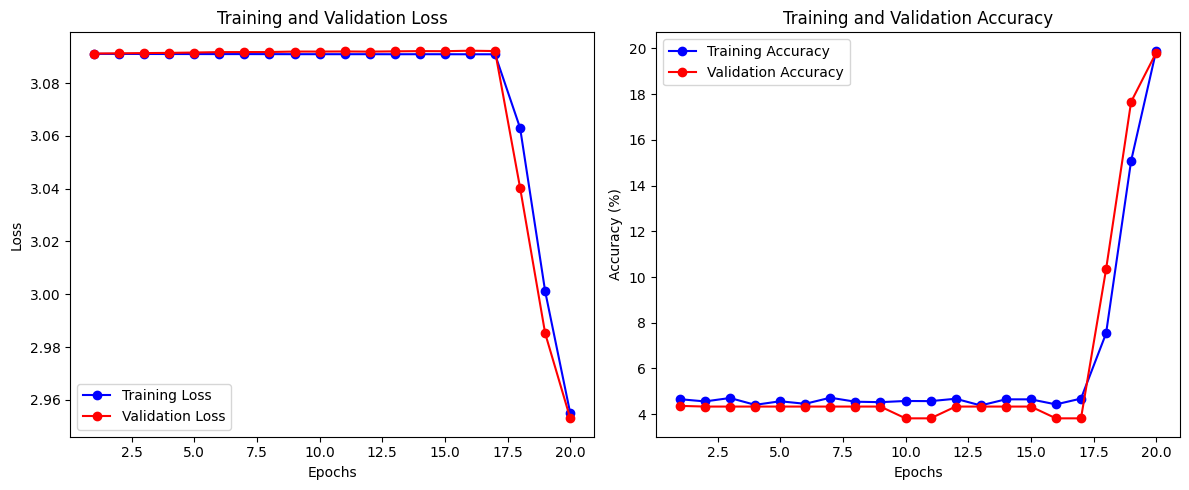

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define BiDirectionalGRU Model
class BiDirectionalGRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiDirectionalGRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Bi-directional GRU layer
        self.gru = nn.GRU(input_size, hidden_size, num_layers,
                          batch_first=True, bidirectional=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size * 2, output_size)  # *2 for bidirectional output

    def forward(self, x):
        # Initialize hidden state
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)  # 2 for bidirectional

        # Forward propagate GRU
        out, _ = self.gru(x, h0)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])  # Use the last time step's output (for classification)

        # Apply softmax to get probabilities for each class
        out = F.softmax(out, dim=1)  # Normalize output to be a probability distribution

        return out



# Initialize Model, Loss, Optimizer
input_dim = stacked_tensors_x.shape[2]  # Example: 768 (embedding size)
hidden_dim = 256
num_layers = 1
num_classes = 22  # Number of categories
modelGRU = BiDirectionalGRU(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, output_size=num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelGRU.parameters(), lr=1e-4)  # Example with GRU

# Training Loop
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelGRU = modelGRU.to(device)  # Example with GRU

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

for epoch in range(num_epochs):
    modelGRU.train()  # Example with GRU
    train_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for embeddings, labels in train_loader:
        embeddings, labels = embeddings.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = modelGRU(embeddings)  # Example with GRU
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * embeddings.size(0)  # Sum the loss across all samples
        _, predicted = torch.max(outputs, dim=1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    train_loss_percentage = (train_loss / total_preds) 
    train_accuracy = 100 * correct_preds / total_preds
    train_losses.append(train_loss_percentage)
    train_accuracies.append(train_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss_percentage:.2f}, Accuracy: {train_accuracy:.2f}%")

    # Validation
    modelGRU.eval()  # Example with GRU
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for embeddings, labels in val_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = modelGRU(embeddings)  # Example with GRU
            loss = criterion(outputs, labels)
            val_loss += loss.item() * embeddings.size(0)  # Sum the loss across all samples
            _, predicted = torch.max(outputs, dim=1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss_percentage = (val_loss / total_preds) 
    val_accuracy = 100 * correct_preds / total_preds
    val_losses.append(val_loss_percentage)
    val_accuracies.append(val_accuracy)
    print(f"Validation Loss: {val_loss_percentage:.2f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Metrics
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

    # # Confusion Matrix
    # cm = confusion_matrix(all_labels, all_preds)
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted Labels')
    # plt.ylabel('True Labels')
    # plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)


Using device: cuda


Training Epoch 1/20: 100%|██████████| 482/482 [00:09<00:00, 51.98it/s]


Epoch [1/20], Loss: 3.09, Accuracy: 4.46%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 3.09, Validation Accuracy: 3.82%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


Training Epoch 2/20: 100%|██████████| 482/482 [00:10<00:00, 44.56it/s]


Epoch [2/20], Loss: 3.09, Accuracy: 4.40%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 3.09, Validation Accuracy: 3.82%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


Training Epoch 3/20: 100%|██████████| 482/482 [00:08<00:00, 54.89it/s]


Epoch [3/20], Loss: 3.09, Accuracy: 4.53%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 3.09, Validation Accuracy: 3.82%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


Training Epoch 4/20: 100%|██████████| 482/482 [00:08<00:00, 58.39it/s]


Epoch [4/20], Loss: 3.09, Accuracy: 4.37%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 3.09, Validation Accuracy: 3.82%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


Training Epoch 5/20: 100%|██████████| 482/482 [00:08<00:00, 56.29it/s]


Epoch [5/20], Loss: 3.09, Accuracy: 4.69%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 3.09, Validation Accuracy: 4.33%
F1 Score: 0.00, Precision: 0.00, Recall: 0.04


Training Epoch 6/20: 100%|██████████| 482/482 [00:08<00:00, 54.97it/s]


Epoch [6/20], Loss: 2.75, Accuracy: 10.54%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 2.57, Validation Accuracy: 15.82%
F1 Score: 0.11, Precision: 0.15, Recall: 0.16


Training Epoch 7/20: 100%|██████████| 482/482 [00:08<00:00, 57.21it/s]


Epoch [7/20], Loss: 2.44, Accuracy: 21.64%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 2.34, Validation Accuracy: 24.97%
F1 Score: 0.20, Precision: 0.20, Recall: 0.25


Training Epoch 8/20: 100%|██████████| 482/482 [00:08<00:00, 57.08it/s]


Epoch [8/20], Loss: 2.16, Accuracy: 30.62%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 2.06, Validation Accuracy: 33.76%
F1 Score: 0.28, Precision: 0.30, Recall: 0.34


Training Epoch 9/20: 100%|██████████| 482/482 [00:08<00:00, 56.39it/s]


Epoch [9/20], Loss: 1.93, Accuracy: 37.65%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 1.89, Validation Accuracy: 39.73%
F1 Score: 0.36, Precision: 0.36, Recall: 0.40


Training Epoch 10/20: 100%|██████████| 482/482 [00:08<00:00, 54.33it/s]


Epoch [10/20], Loss: 1.75, Accuracy: 44.36%


c:\Users\Lenovo\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Loss: 1.73, Validation Accuracy: 46.24%
F1 Score: 0.43, Precision: 0.43, Recall: 0.46


Training Epoch 11/20: 100%|██████████| 482/482 [00:09<00:00, 52.35it/s]


Epoch [11/20], Loss: 1.55, Accuracy: 51.08%
Validation Loss: 1.58, Validation Accuracy: 50.88%
F1 Score: 0.49, Precision: 0.50, Recall: 0.51


Training Epoch 12/20: 100%|██████████| 482/482 [00:09<00:00, 49.39it/s]


Epoch [12/20], Loss: 1.39, Accuracy: 57.00%
Validation Loss: 1.45, Validation Accuracy: 56.48%
F1 Score: 0.56, Precision: 0.56, Recall: 0.56


Training Epoch 13/20: 100%|██████████| 482/482 [00:08<00:00, 58.25it/s]


Epoch [13/20], Loss: 1.24, Accuracy: 62.24%
Validation Loss: 1.35, Validation Accuracy: 59.36%
F1 Score: 0.59, Precision: 0.59, Recall: 0.59


Training Epoch 14/20: 100%|██████████| 482/482 [00:08<00:00, 59.39it/s]


Epoch [14/20], Loss: 1.12, Accuracy: 65.84%
Validation Loss: 1.29, Validation Accuracy: 62.52%
F1 Score: 0.62, Precision: 0.63, Recall: 0.63


Training Epoch 15/20: 100%|██████████| 482/482 [00:08<00:00, 55.49it/s]


Epoch [15/20], Loss: 1.03, Accuracy: 69.13%
Validation Loss: 1.26, Validation Accuracy: 62.79%
F1 Score: 0.62, Precision: 0.63, Recall: 0.63


Training Epoch 16/20: 100%|██████████| 482/482 [00:09<00:00, 49.79it/s]


Epoch [16/20], Loss: 0.95, Accuracy: 71.82%
Validation Loss: 1.20, Validation Accuracy: 65.18%
F1 Score: 0.65, Precision: 0.65, Recall: 0.65


Training Epoch 17/20: 100%|██████████| 482/482 [00:09<00:00, 53.19it/s]


Epoch [17/20], Loss: 0.88, Accuracy: 74.10%
Validation Loss: 1.17, Validation Accuracy: 66.64%
F1 Score: 0.66, Precision: 0.67, Recall: 0.67


Training Epoch 18/20: 100%|██████████| 482/482 [00:08<00:00, 56.26it/s]


Epoch [18/20], Loss: 0.81, Accuracy: 76.55%
Validation Loss: 1.18, Validation Accuracy: 66.64%
F1 Score: 0.67, Precision: 0.67, Recall: 0.67


Training Epoch 19/20: 100%|██████████| 482/482 [00:09<00:00, 52.97it/s]


Epoch [19/20], Loss: 0.76, Accuracy: 77.79%
Validation Loss: 1.19, Validation Accuracy: 66.73%
F1 Score: 0.66, Precision: 0.67, Recall: 0.67


Training Epoch 20/20: 100%|██████████| 482/482 [00:09<00:00, 51.41it/s]


Epoch [20/20], Loss: 0.70, Accuracy: 79.52%
Validation Loss: 1.16, Validation Accuracy: 67.58%
F1 Score: 0.68, Precision: 0.68, Recall: 0.68


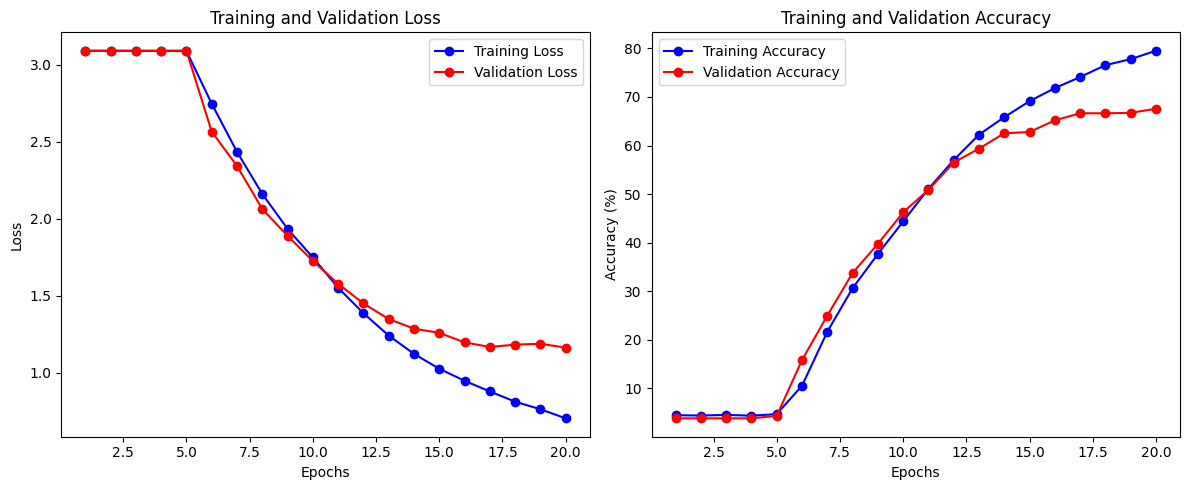

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
from tqdm import tqdm

# **✅ Define BiDirectional GRU Model**
class BiDirectionalGRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiDirectionalGRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Bi-directional GRU layer
        self.gru = nn.GRU(input_size, hidden_size, num_layers,
                          batch_first=True, bidirectional=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size * 2, output_size)  # *2 for bidirectional output

    def forward(self, x):
        batch_size = x.size(0)

        # Initialize hidden state (GRU does not use cell state like LSTM)
        h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)  # 2 for bidirectional

        # Forward propagate GRU
        out, _ = self.gru(x, h0)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])  # Use last time step's output

        return out  # **No Softmax Here** (Handled in Training Loop)

# **✅ Initialize Model, Loss, Optimizer**
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

input_dim = stacked_tensors_x.shape[2]  # Example: 768 (embedding size)
hidden_dim = 256
num_layers = 1
num_classes = 22  # Number of categories

modelGRU = BiDirectionalGRU(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, output_size=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelGRU.parameters(), lr=1e-4)

# **✅ Training Setup**
num_epochs = 20
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# **✅ Function to Plot Training & Validation Metrics**
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# **✅ Training Loop**
for epoch in range(num_epochs):
    modelGRU.train()
    train_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for embeddings, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelGRU(embeddings)  # **GRU Model**
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * embeddings.size(0)
        _, predicted = torch.max(outputs, dim=1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    train_loss_percentage = (train_loss / total_preds)
    train_accuracy = 100 * correct_preds / total_preds
    train_losses.append(train_loss_percentage)
    train_accuracies.append(train_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss_percentage:.2f}, Accuracy: {train_accuracy:.2f}%")

    # **✅ Validation**
    modelGRU.eval()
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for embeddings, labels in val_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = modelGRU(embeddings)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * embeddings.size(0)
            _, predicted = torch.max(outputs, dim=1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss_percentage = (val_loss / total_preds)
    val_accuracy = 100 * correct_preds / total_preds
    val_losses.append(val_loss_percentage)
    val_accuracies.append(val_accuracy)
    print(f"Validation Loss: {val_loss_percentage:.2f}, Validation Accuracy: {val_accuracy:.2f}%")

    # **✅ Compute Metrics**
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

# **✅ Plot Results**
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)


In [31]:
categories = list(label_to_index.keys())

In [32]:
print(type(embedding_model))


<class 'transformers.models.bert.modeling_bert.BertModel'>


In [33]:
# Extract categories from label_to_index dictionary
categories = list(label_to_index.keys())

# Example: Print categories
print(categories)


['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS', 'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS', 'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS', 'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA', 'QUEER VOICES', 'HOME & LIVING', 'WOMEN']
